In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
input_files = [
    'edgar_allan_poe.txt',
    'robert_frost.txt'
]

In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
input_texts = []
labels = []
for label,f in enumerate(input_files):
    print(f"{f} corresponds to label {label}")
    for line in open(f):
        line = line.rstrip().lower()
        if line:
            line = line.translate(str.maketrans('','',string.punctuation))
            input_texts.append(line)
            labels.append(label)

edgar_allan_poe.txt corresponds to label 0
robert_frost.txt corresponds to label 1


In [5]:
print('size of data', len(input_texts))

size of data 2158


In [6]:
df = pd.DataFrame(input_texts,columns=['data'])
df['label'] = labels
df

,data,label
0,lo death hath reard himself a throne,0
1,in a strange city all alone,0
2,far down within the dim west,0
3,where the good and the bad and the worst and t...,0
4,have gone to their eternal rest,0
...,...,...
2153,to say which buds are leaf and which are bloom,1
2154,a featherhammer gives a double knock,1
2155,this eden day is done at two oclock,1
2156,an hour of winter day might seem too short,1


C:\Users\DELL\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='label', ylabel='count'>

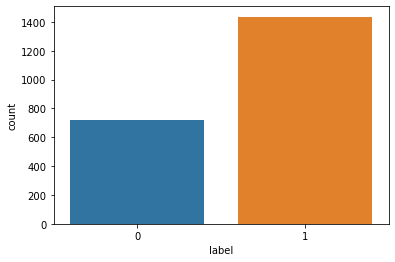

In [7]:
sns.countplot(df['label'])

In [8]:
X_train,X_test, y_train, y_test = train_test_split(df['data'],df['label'])

In [9]:
print('length of X_train',len(X_train) )
print('length of X_test',len(X_test) )
print('total X ',len(X_train) + len(X_test) )
print('length of y_train',len(y_train) )
print('length of y_test',len(y_test) )
print('total Y ',len(y_train) + len(y_test) )

length of X_train 1618
length of X_test 540
total X  2158
length of y_train 1618
length of y_test 540
total Y  2158


In [10]:
# word 2 index
from nltk.tokenize import RegexpTokenizer

def word2index(corpus,tokenizer):
    w2i = {'unk' : 0} # for unknown.
    idx = 1
    for doc in corpus:
        wordsindoc = tokenizer.tokenize(doc.lower())
        for word in wordsindoc:
            if word not in w2i:
                w2i[word] = idx
                idx += 1
    return w2i

def index2word(w2i):
    i2w = []
    for word,index in w2i.items():
        i2w.append(word)
    return i2w

In [11]:
# initialize amount of data
train_size = len(X_train)
test_size = len(X_test)
X_train_data = X_train[:train_size]
X_test_data  = X_test[:test_size]
y_train      = y_train[:train_size]
y_test       = y_test[:test_size]

In [12]:
tokenizer = RegexpTokenizer(r'\w+')
w2i = word2index(X_train_data,tokenizer)
i2w = index2word(w2i) 

In [13]:
print('w2i\n',w2i)
print('i2w\n',i2w)
print('length of words\n',len(i2w))

w2i
 {'unk': 0, 'you': 1, 'said': 2, 'knew': 3, 'the': 4, 'place': 5, 'where': 6, 'once': 7, 'on': 8, 'kinsman': 9, 'its': 10, 'too': 11, 'run': 12, 'down': 13, 'this': 14, 'is': 15, 'last': 16, 'of': 17, 'it': 18, 'wreathed': 19, 'in': 20, 'myrtle': 21, 'my': 22, 'sword': 23, 'ill': 24, 'conceal': 25, 'weve': 26, 'been': 27, 'here': 28, 'fifteen': 29, 'years': 30, 'and': 31, 'looked': 32, 'one': 33, 'as': 34, 'far': 35, 'i': 36, 'could': 37, 'they': 38, 'bad': 39, 'brought': 40, 'home': 41, 'from': 42, 'some': 43, 'publisher': 44, 'no': 45, 'dont': 46, 'trust': 47, 'your': 48, 'eyes': 49, 'youve': 50, 'enough': 51, 'a': 52, 'bird': 53, 'with': 54, 'an': 55, 'angelic': 56, 'gift': 57, 'tell': 58, 'why': 59, 'he': 60, 'ever': 61, 'cared': 62, 'himself': 63, 'thats': 64, 'his': 65, 'mistake': 66, 'dear': 67, 'knows': 68, 'interest': 69, 'how': 70, 'should': 71, 'love': 72, 'thee': 73, 'or': 74, 'deem': 75, 'wise': 76, 'yes': 77, 'stark': 78, 'cannot': 79, 'write': 80, 'speak': 81, 'think

In [14]:
# convert data into integers
train_docs_as_int = []
test_docs_as_int  = []

for line in X_train_data:
    tokens = tokenizer.tokenize(line.lower())
    line_as_int = [w2i[token] for token in tokens]
    train_docs_as_int.append(line_as_int)
for line in X_test_data:
    tokens = tokenizer.tokenize(line.lower())
    line_as_int = [w2i.get(token,0) for token in tokens]
    test_docs_as_int.append(line_as_int)

In [15]:
print('length of train_docs_as_int ',len(train_docs_as_int))
print('length of test_docs_as_int ',len(test_docs_as_int))

length of train_docs_as_int  1618
length of test_docs_as_int  540


In [16]:
# initialize A and pi matrices for train and test data
V = len(w2i)

A0  = np.ones((V,V))
pi0 = np.ones(V)

A1  = np.ones((V,V))
pi1 = np.ones(V)

In [17]:
def compute_markov_transition(text_as_int,A,pi):
    for tokens in text_as_int:
        last_idx = None
        for idx in tokens:
            if last_idx is None:
                pi[idx] += 1
            else:
                # last word exist and hence the transition
                A[last_idx,idx] += 1
            # update the last idx
            last_idx = idx

In [18]:
def compute_counts(w2i,data):
    V = len(w2i)
    print(V)
    A0  = np.ones((V,V))
    pi0 = np.ones(V)
    compute_markov_transition(data,A0,pi0)
    return A0,pi0
    

In [19]:
print(train_docs_as_int)
# split data for each label.
edgar_allan_poem = [t for t,y in zip(train_docs_as_int,y_train) if y ==0]
robert_frost = [t for t,y in zip(train_docs_as_int,y_train) if y ==1]
# for label edgar_allan_poem
A0,pi0 = compute_counts(w2i,edgar_allan_poem)
print('edgar_allan_poem\n',edgar_allan_poem)
print(A0)
print(pi0)
A1,pi1 = compute_counts(w2i,robert_frost)
print('robert_frost\n',robert_frost)
print(A1)
print(pi1)

[[1, 2, 1, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 4, 16, 17, 18], [19, 20, 21, 22, 23, 24, 25], [26, 27, 28, 29, 30], [31, 32, 13, 33, 34, 35, 34, 36, 37], [38, 39, 27, 40, 41, 42, 43, 44], [45, 36, 46, 47, 48, 49, 50, 2, 51], [52, 53, 54, 55, 56, 57], [37, 58, 1, 59, 60, 61, 62, 63], [64, 65, 66, 4, 67, 68, 22, 69], [70, 71, 60, 72, 73, 74, 70, 75, 73, 76], [77, 78, 31, 1], [36, 79, 80, 36, 79, 81, 74, 82], [59, 83, 1, 81, 84, 85, 86, 83, 1, 87], [88, 89, 90, 91, 89], [36, 92, 93, 52, 94, 95, 96, 97], [98, 99, 100, 101, 52, 102, 31, 52, 103], [4, 104, 105, 4, 106, 107, 64, 4, 33], [108, 109, 110, 52, 111], [112, 95, 113, 114, 20, 4, 115, 116, 38, 117, 118], [119, 120], [52, 121, 122, 123, 124, 125], [126, 127, 70, 128, 129, 8, 130, 128], [4, 131, 17, 132, 133, 134, 17, 135], [84, 136, 8, 52, 137], [36, 138, 4, 139, 140, 141, 8, 4, 142], [143, 144, 4, 145, 85, 15, 45, 146, 52, 145], [52, 147, 17, 148, 149, 146, 74, 150], [95, 151, 20, 152, 36, 153, 154, 113, 155], [31, 36, 87, 

 [1. 1. 1. ... 1. 1. 1.]]
[1. 1. 3. ... 1. 1. 1.]
2525
robert_frost
 [[1, 2, 1, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 4, 16, 17, 18], [26, 27, 28, 29, 30], [31, 32, 13, 33, 34, 35, 34, 36, 37], [38, 39, 27, 40, 41, 42, 43, 44], [45, 36, 46, 47, 48, 49, 50, 2, 51], [52, 53, 54, 55, 56, 57], [37, 58, 1, 59, 60, 61, 62, 63], [64, 65, 66, 4, 67, 68, 22, 69], [77, 78, 31, 1], [59, 83, 1, 81, 84, 85, 86, 83, 1, 87], [36, 92, 93, 52, 94, 95, 96, 97], [4, 104, 105, 4, 106, 107, 64, 4, 33], [108, 109, 110, 52, 111], [112, 95, 113, 114, 20, 4, 115, 116, 38, 117, 118], [119, 120], [52, 121, 122, 123, 124, 125], [126, 127, 70, 128, 129, 8, 130, 128], [4, 131, 17, 132, 133, 134, 17, 135], [36, 138, 4, 139, 140, 141, 8, 4, 142], [143, 144, 4, 145, 85, 15, 45, 146, 52, 145], [52, 147, 17, 148, 149, 146, 74, 150], [95, 151, 20, 152, 36, 153, 154, 113, 155], [31, 36, 87, 17, 33, 85, 156, 157], [158, 1, 159, 160, 6, 1, 161], [130, 45, 33, 171, 146, 116, 172, 134], [125, 52, 145, 176, 17, 177], 

In [20]:
# normalize A and pi so they are valid probability matrices
A0 /= A0.sum(axis=1,keepdims=True)
pi0 /= pi0.sum()

A1 /= A1.sum(axis=1,keepdims=True)
pi1 /= pi1.sum()

print('edgar_allan_poem\n',edgar_allan_poem)
print(A0)
print(pi0)
print('robert_frost\n',robert_frost)
print(A1)
print(pi1)

edgar_allan_poem
 [[19, 20, 21, 22, 23, 24, 25], [70, 71, 60, 72, 73, 74, 70, 75, 73, 76], [36, 79, 80, 36, 79, 81, 74, 82], [88, 89, 90, 91, 89], [98, 99, 100, 101, 52, 102, 31, 52, 103], [84, 136, 8, 52, 137], [17, 162, 163, 164, 165, 166, 34, 4, 167], [31, 168, 130, 43, 146, 169, 170], [161, 20, 173, 174, 175], [101, 34, 183, 34, 4, 184, 17, 4, 185, 85, 1, 186, 18], [204, 205, 20, 206, 17, 4, 207], [208, 4, 209, 210, 17, 52, 211], [17, 86, 20, 213, 214, 215, 216, 31, 217], [18, 124, 218, 219, 4, 220, 221, 17, 222], [235, 20, 173, 236, 237], [144, 45, 248, 249, 250], [52, 269, 270, 117, 120], [275, 276, 4, 277, 216, 278], [43, 291, 292, 35, 31, 293], [299, 7, 279, 133, 300, 13, 28], [304, 305, 38, 306, 20, 4, 307], [70, 310, 279, 311, 162, 312, 313, 314], [4, 315, 225, 17, 162, 163, 316, 317, 73], [8, 14, 331, 17, 162, 332, 20, 4, 333], [31, 36, 2, 334, 15, 335, 152, 336], [85, 337, 31, 134, 20, 14, 338, 339], [130, 343, 100, 4, 344, 130, 4, 345], [42, 22, 346, 347, 4, 348], [365, 10

In [21]:
# log A and pi since we don't need the acutal probabilities
logA0 = np.log(A0)
logpi0 = np.log(pi0)

logA1 = np.log(A1)
logpi1 = np.log(pi1)

print('log edgar_allan_poem\n',edgar_allan_poem)
print(logA0)
print(logpi0)
print('log robert_frost\n',robert_frost)
print(logA1)
print(logpi1)

log edgar_allan_poem
 [[19, 20, 21, 22, 23, 24, 25], [70, 71, 60, 72, 73, 74, 70, 75, 73, 76], [36, 79, 80, 36, 79, 81, 74, 82], [88, 89, 90, 91, 89], [98, 99, 100, 101, 52, 102, 31, 52, 103], [84, 136, 8, 52, 137], [17, 162, 163, 164, 165, 166, 34, 4, 167], [31, 168, 130, 43, 146, 169, 170], [161, 20, 173, 174, 175], [101, 34, 183, 34, 4, 184, 17, 4, 185, 85, 1, 186, 18], [204, 205, 20, 206, 17, 4, 207], [208, 4, 209, 210, 17, 52, 211], [17, 86, 20, 213, 214, 215, 216, 31, 217], [18, 124, 218, 219, 4, 220, 221, 17, 222], [235, 20, 173, 236, 237], [144, 45, 248, 249, 250], [52, 269, 270, 117, 120], [275, 276, 4, 277, 216, 278], [43, 291, 292, 35, 31, 293], [299, 7, 279, 133, 300, 13, 28], [304, 305, 38, 306, 20, 4, 307], [70, 310, 279, 311, 162, 312, 313, 314], [4, 315, 225, 17, 162, 163, 316, 317, 73], [8, 14, 331, 17, 162, 332, 20, 4, 333], [31, 36, 2, 334, 15, 335, 152, 336], [85, 337, 31, 134, 20, 14, 338, 339], [130, 343, 100, 4, 344, 130, 4, 345], [42, 22, 346, 347, 4, 348], [365

In [22]:
# compute probablity of each class or label
count0 = sum(y ==0 for y in y_train)
count1 = sum(y ==1 for y in y_train)
total  = len(y_train)
p0 = count0/total
p1 = count1/total
logp0 = np.log(p0)
logp1 = np.log(p1)

print('count for y == 0) ', count0)
print('count for y == 1) ', count1)
print('total ', total)
p0,p1

count for y == 0)  552
count for y == 1)  1066
total  1618


(0.3411619283065513, 0.6588380716934487)

In [23]:
# build a markov classifier

class MarkovClassifier:
    def __init__(self,logAs,logpis,logprobability):
        self.logAs = logAs
        self.logpis = logpis
        self.logprobability = logprobability
        self.K = len(logprobability)
        
    def _compute_log_likelyhood_(self,input_,class_):
        logA  = self.logAs[class_]
        logpi = self.logpis[class_]
        
        last_idx = None
        logprob  = 0
        for idx in input_:
            if last_idx is None:
                # first token
                logprob += logpi[idx]
            else:
                logprob += logA[last_idx,idx]
            # update last idx
            last_idx = idx
        return logprob
    
    def predict(self,inputs):
        predictions = np.zeros(len(inputs))
        for i, input__ in enumerate(inputs):
            posteriors = [self._compute_log_likelyhood_(input__,c) + self.logprobability[c] \
                         for c in range(self.K)]
            pred = np.argmax(posteriors)
            predictions[i] = pred
        return predictions
    

In [24]:
clf = MarkovClassifier([logA0,logA1],[logpi0,logpi1],[logp0,logp1])

In [25]:
Ptrain = clf.predict(train_docs_as_int)
print(f"Train acc : {np.mean(Ptrain == y_train)}")

Train acc : 0.9962917181705809


In [26]:
Ptest = clf.predict(test_docs_as_int)
print(f"Test acc : {np.mean(Ptest == y_test)}")

Test acc : 0.8481481481481481


In [27]:
X_test_data

1131    the outside doors as yet have held against us
868                 that everyone for miles could see
740                   i took the one less traveled by
1303     when i heard toffile upstairs in the bedroom
1593            of an acquaintance made adventurously
                            ...                      
639           wearing its own deep feeling as a crown
588                 on the door of this legended tomb
1406                 i dont remember why i ever cared
126                   that cannot but guide us aright
1835                                its hands of gold
Name: data, Length: 540, dtype: object

In [28]:
y_test

1131    1
868     1
740     1
1303    1
1593    1
       ..
639     0
588     0
1406    1
126     0
1835    1
Name: label, Length: 540, dtype: int64

In [29]:
X_train_data

1058    you said you knew the place where once on kinsman
1959              its too run down this is the last of it
151               wreathed in myrtle my sword ill conceal
1947                         weve been here fifteen years
725                 and looked down one as far as i could
                              ...                        
656                                     the love of years
1610              with flowers in her lap until they fade
1692                       like profanation by your leave
1719             there is a house that is no more a house
2049                    he manages to keep the upper hand
Name: data, Length: 1618, dtype: object

In [30]:
from sklearn.metrics import confusion_matrix,f1_score

In [31]:
cm = confusion_matrix(y_train,Ptrain)
cm

array([[ 546,    6],
       [   0, 1066]], dtype=int64)

In [32]:
cm_test = confusion_matrix(y_test,Ptest)
cm_test

array([[ 95,  75],
       [  7, 363]], dtype=int64)

In [33]:
f1_score(y_train,Ptrain)

0.9971936389148738

In [34]:
f1_score(y_test,Ptest)

0.8985148514851485